<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/KalmanFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman filter

Kalman Filter takes in time series data as input and provide estimates for each time step. 



### A simple example
weighting the gold bar (a truth value of 1010 g)

$\hat{x}_n = \hat{x}_{n-1} + K_n (z_n - \hat{x}_{n-1})$

choose $K_n=1/n$ to take the average of all measurements

|n|	1|	2|	3|	4|	5|	6|	7|	8|	9|	10|
|:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$K_n$	|1	|1/2|	1/3|	1/4|	1/5	|1/6|	1/7|	1/8|	1/9|	1/10|
|$z_n$	|1030	|989	|1017|	1009|	1013|	979|	1008	|1042|	1012	|1011|
|$\hat{x}_{n-1}$	|1030	|1009.5|	1012|	1011.25|	1011.6	|1006.17	|1006.43	|1010.87|	1011	|1011|
|$\hat{x}_n$	|1030	|1009.5	|1012	|1011.25	|1011.6	|1006.17	|1006.43	|1010.87	|1011	|1011|

Mounted at /content/drive/


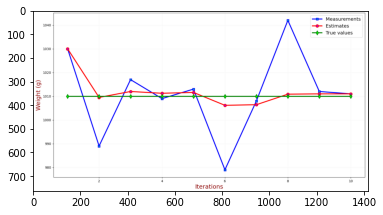

In [ ]:
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

drive.mount('/content/drive/')
!cp /content/drive/My\ Drive/Colab\ Notebooks/PHYS411/ExtraMaterial/GoldBar_MeasVsTrueVsEst.png .

image = mpimg.imread("./GoldBar_MeasVsTrueVsEst.png")
plt.imshow(image)
plt.show()

### A slightly complicated example

If we define $KG$ to be the Kalman gain, $E_{EST}$ to be the error in the estimate, and $E_{MEA}$ to be the error in the measurement, we have

$$
KG = \frac{E_{EST}}{E_{EST} + E_{MEA}}
$$

we have $0 \le K_n \le 1$ and 

| Measurements | $KG$ | Estimates | 
| :-: | - | :-: |
| Accurate | 1 | Unstable (large error)|
|  | | | 
|Inaccurate| 0 | Stable (small error)| 

Steps are:
1. Calculate the Kalman Gain: $KG = \frac{E_{EST}}{E_{EST} + E_{MEA}}$
2. Calculate the current estimate: $EST_n = EST_{n-1} + KG [MEA - EST_{n-1}]$
3. Calculate the new estimate error: $E_{EST_n}= \frac{E_{MEA}E_{EST_{n-1}}}{E_{MEA}+E_{EST_{n-1}}}=[1-KG]E_{EST_{n-1}}$

An example: **true temperature = 72 degree**, initial estimate = 68 degree, initial estimate error:  2 degree; initial measurement = 75 degree, error in measurement = 4 degree

With the first measurement of 75 degree, we have $KG=0.33$, $EST_n=70.33$, and $E_{EST_n}=1.33$; \\
with the second measurement of 71 degree, we have $KG=0.25$, $EST_n=70.50$, and $E_{EST_n}=1.00$; \\
with the third measurement of 70 degree, we have $KG=0.20$, $EST_n=70.40$, and $E_{EST_n}=0.80$; \\
with the fourth measurement of 74 degree, we have $KG=0.17$, $EST_n=71.00$, and $E_{EST_n}=0.66$.


## Kalman Filter's Recursion Process

$\mathbf{x}_k$: the internal state of a system at time $k$ 

$\mathbf{A}$: a state transition matrix

$\hat{\mathbf{x}}_{k-1}$: the estimated state on the previous time step 

$\mathbf{w}_k$: the associated noise which is assumed to be normally distributed

$\mathbf{z}_k$: measurement at time $k$

$\mathbf{H}$: the noiseless connection between the state vector and the measurement vector 

$\mathbf{Q}$: covariance matrix for the associated estimation error

$\mathbf{R}$: covariance matrix for the associated measurement error

$\mathbf{Q}$: Kalman gain

$\mathbf{P}$: Error covariance matrix

**Five equations for the Kalman filter**
>
> 1. Kalman Gain: $\mathbf{K}=\mathbf{P}_{k-1} \mathbf{H}^{\mathbf{T}}\left(\mathbf{H} \mathbf{P}_{k-1} \mathbf{H}^{\mathbf{T}}+\mathbf{R}\right)^{(-1)}$ 
>2. Estimate Update: $\hat{\mathbf{x}}_k=\hat{\mathbf{x}}_{k-1}+\mathbf{K}\left>(\mathbf{z}_k-\mathbf{H} \hat{\mathbf{x}}_{k-1}\right)$ 
>3. Covariance Update: $\mathbf{P}=\left(\mathbf{I}-\mathbf{K}_k \mathbf{H}\right) \mathbf{P}_{k-1}$ 
>4. Estimate Projection: $\mathbf{x}_{k+1}=\mathbf{A x}_k+\mathbf{w}_k$ 
>5. Estimate Error Covariance: $\mathbf{P}_{k+1}=\mathbf{A P}_k \mathbf{A}^{\mathbf{T}}+\mathbf{Q}$ 
>

The process can be found at [here](https://drive.google.com/file/d/1lMH3NwhWUhCJmhhwiBujCJaVzcixTn95/view?usp=sharing)


https://github.com/Ugenteraan/Kalman-Filter-Scratch/blob/master/Kalman-Scratch-Implementation.ipynb

In this example, we're going to estimate the displacement and velocity of a moving vehicle. The vehicle starts at 2 m/s from a resting position with 0 acceleration. Acceleration will be introduced to the system at specific time steps.

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

#Initializations
current_velocity = 2
current_displacement = 0
current_acceleration = 0
total_time = 100

#acceleration_dict holds the value of acceleration at different time steps.
acceleration_dict = {
    0: 0,
    5: 2,
    10: 8,
    20: -2,
    40: 5,
    45: 9,
    60: -3,
    85: 0
}

true_values = []

for t in range(1, total_time+1):
    #These calculations are based on basic kinematics equations.
    current_displacement = current_displacement + current_velocity + 0.5*current_acceleration
    
     #get the acceleration from the dictionary
    try:
        current_acceleration = acceleration_dict[t]
    except KeyError:
        pass
    
    current_velocity = current_velocity + current_acceleration
    
    #append displacement,velocity and acceleration in tuples.
    true_values.append((current_displacement, current_velocity, current_acceleration))

Add random noise to the true values

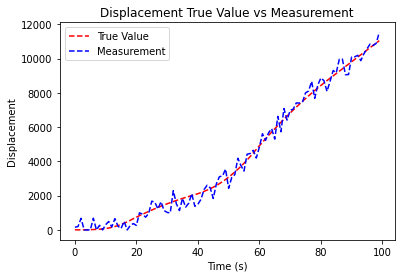

In [ ]:
#the range to perturb the data for displacement, velocity, and acceleration
error_range = [700, 30, 15]

#list to keep the perturbed data as measurements.
measurement = []

for item in true_values:
    #unpack
    d,v,a = item
    
    random_err = [random.randint(-1*error_range[0], error_range[0]), random.randint(-1*error_range[1], error_range[1]), random.randint(-1*error_range[2], error_range[2])]
    
    new_displacement = d + random_err[0] if d+random_err[0] >0 else 0    # displacement will not go below 0
    new_velocity = v + random_err[1]
    new_acceleration = a + random_err[2]
    
    measurement.append((new_displacement, new_velocity, new_acceleration))

plt.plot([i for i in range(total_time)], [y[0] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[0] for y in measurement], 'b--', label='Measurement')

plt.title("Displacement True Value vs Measurement")
plt.ylabel("Displacement")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

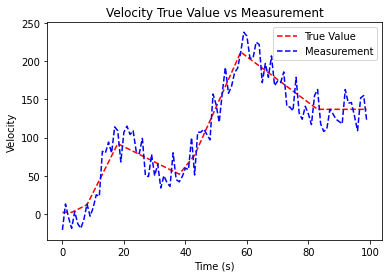

In [ ]:
plt.plot([i for i in range(total_time)], [y[1] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[1] for y in measurement], 'b--', label='Measurement')

plt.title("Velocity True Value vs Measurement")
plt.ylabel("Velocity")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

## Kalman filter

In [ ]:
#initialization
x_k = np.asarray([30, 20]) #first estimate. elem 0 = displacement, elem 1 = velocity
Q = np.asarray([[0.004, 0.002],[0.002, 0.001]]) #Estimate error covariance
A = np.asarray([[1,1], [0,1]]) #Transition matrix. Displacement is updated with prev disp + curr vel while velocity is updated with prev vel (assuming we have no knowledge about the acceleration)
R = np.asarray([[0.4,0.01], [0.04,0.01]]) #Measurement error. This is higher than estimation error since we know our measurement contains a lot of noises.
H = np.asarray([[1,0], [0,1]]) #Observation matrix. We want every state from our state vector.
P = np.asarray([[0,0], [0,0]]) #Error matrix. 

estimation = []

for k_loop in range(total_time):
    
    #z_k is the measurement at every step
    z_k = np.asarray([measurement[k_loop][0], measurement[k_loop][1]])
    
    x_k = A.dot(x_k) #predict estimate
    P = (A.dot(P)).dot(A.T) + Q #predict error covariance
    
    K = (P.dot(H.T)).dot(np.linalg.inv((H.dot(P).dot(H.T)) + R)) #update Kalman Gain
    x_k = x_k + K.dot((z_k - H.dot(x_k))) #update estimate
    
    P = (np.identity(2) - K.dot(H)).dot(P) #update error covariance
    
    estimation.append((x_k[0], x_k[1])) #append the estimations

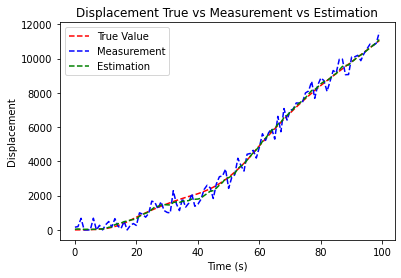

In [ ]:
plt.plot([i for i in range(total_time)], [y[0] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[0] for y in measurement], 'b--', label='Measurement')
plt.plot([i for i in range(total_time)], [y[0] for y in estimation], 'g--', label='Estimation')

plt.title("Displacement True vs Measurement vs Estimation")
plt.ylabel("Displacement")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

Dealy on the velocity prediction

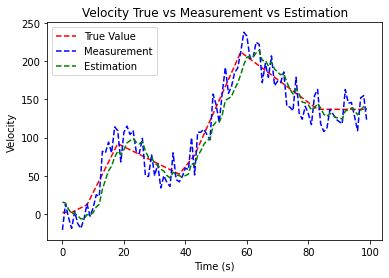

In [ ]:
plt.plot([i for i in range(total_time)], [y[1] for y in true_values], 'r--', label='True Value')
plt.plot([i for i in range(total_time)], [y[1] for y in measurement], 'b--', label='Measurement')
plt.plot([i for i in range(total_time)], [y[1] for y in estimation], 'g--', label='Estimation')


plt.title("Velocity True vs Measurement vs Estimation")
plt.ylabel("Velocity")
plt.xlabel("Time (s)")
plt.legend()
plt.show()